In [106]:
import csv
import random
import math
import operator
import numpy as np
from numpy import array
import os
import cv2
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog
 
def euclideanDistance(instance1, instance2): #유클리드 거리 계산
  distance = 0.0
  diff = instance1 - instance2
  diffpow = pow(diff,2)
  distance = diffpow.sum()
  return math.sqrt(distance)
 
def getNeighbors(trainingSet, testInstance, dataset_category, k):
  distances = []
  
  for x in range(len(trainingSet)):
    dist = euclideanDistance(testInstance[x], trainingSet[x]) #testinstance와 거리를 계산
    distances.append((dataset_category[x], dist)) #각 trainingSet간의 거리를 리스트에 저장
    #print(dist)
  distances.sort(key=operator.itemgetter(1)) #거리를 기준으로 소팅
  neighbors = []
  
  for x in range(k): #k번쨰까지
    neighbors.append(distances[x][0]) #데이터만을 neighbors 리스트에 추가
  return neighbors


def getResponse(neighbors):
  classVotes = {}
  for x in range(len(neighbors)):
    response = neighbors[x] #클래스 정보
    if response in classVotes: #dict에 있으면 1추가
      classVotes[response] += 1
    else: #없으면 1로 초기화
      classVotes[response] = 1
  sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True) #가장 많은 투표를 받은 클래스 순으로 정렬
  return sortedVotes[0][0] #가장 많은 투표를 받은 클래스를 리턴

def getAccuray(trainingSet, testSet, training_category, test_category, k):
    accuracy = 0.0
    correct  = 0
    
    for x in range(len(testSet)):
        neighbors = []
        testInstance = np.tile(testSet[x], (len(trainingSet), 1))   # 분류대상
        testInstance = np.array(testInstance, dtype='float')
        neighbors = getNeighbors(trainingSet, testInstance, training_category, k)
        
        prediction = getResponse(neighbors)
        if prediction == test_category[x]:
            correct += 1
    return (correct/len(testSet)) * 100.0


TRAIN_DIR = 'C:/Users/BKH/MNIST/trainingSet/'
train_folder_list = array(os.listdir(TRAIN_DIR))
  
train_input = []
train_label = []
cnt = 0
for index in range(len(train_folder_list)):
    path = os.path.join(TRAIN_DIR, train_folder_list[index])
    path = path + '/'
    img_list = os.listdir(path)
    
    for img in img_list:
        if cnt >= 200 :
            cnt = 0
            break
        
        img_path = os.path.join(path, img)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        train_input.append(img)
        train_label.append(index)
        cnt = cnt + 1
        
        
dataset_train = np.array(train_input, dtype='float')
dataset_train = np.reshape(train_input, (-1, 784))
dataset_train_category = np.array(train_label, dtype='float') 
print(dataset_train.shape)

TEST_DIR  = 'C:/Users/BKH/MNIST/testSet/'
test_folder_list = array(os.listdir(TEST_DIR))
  
test_input = []
test_label = []
cnt = 0
for index in range(len(test_folder_list)):
    path = os.path.join(TEST_DIR, test_folder_list[index])
    path = path + '/'
    
    img_list = os.listdir(path)
    for img in img_list:
        img_path = os.path.join(path, img)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        #img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        test_input.append(img)
        test_label.append(index)
        cnt = cnt + 1
        
dataset_test = np.array(test_input, dtype='float')
dataset_test = np.reshape(test_input, (-1, 784))
dataset_test_category = np.array(test_label, dtype='float') 

(2000, 784)


k값 입력(1~3):3
k=3, accuracy=92.50%
i think tha digit is : 0.0


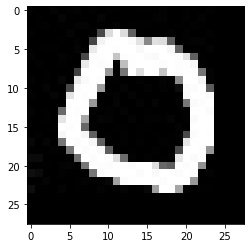

In [108]:
k = int(input('k값 입력(1~3):'))

accuracy = getAccuray(dataset_train, dataset_test, dataset_train_category, dataset_test_category, k)
print("k=%d, accuracy=%.2f%%" % (k, accuracy))


root = tk.Tk()
root.withdraw()

filename = filedialog.askopenfilename()
target = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
target = np.array(target, dtype='float')
target = np.reshape(target, (-1, 784))
dataset_target = np.tile(target, (len(dataset_train), 1))   # 분류대상
neighbors = getNeighbors(dataset_train, dataset_target, dataset_train_category,k)

prediction = getResponse(neighbors)
print("i think tha digit is : {}".format(prediction))

imgdata = np.array(target, dtype='float')
pixels = imgdata.reshape((28,28))
plt.imshow(pixels,cmap='gray')
plt.show()
